<a href="https://colab.research.google.com/github/niharraju4/Hyperparameter_tuning/blob/main/Hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                     Hyperparameter Tuning

 # **Hyperparameters** are different parameter values that are used to control the learning process and have a significant effect on the performance of machine learning models.

*   This process plays a vital role in the prediction accuracy of a machine
learning algorithm.

*   Most of these machine learning algorithms come with the default values of their hyperparameters. But the default values do not always perform well on different types of Machine Learning projects. This is why you need to optimize them in order to get the right combination that will give you the best performance.



## **How to optimize hyperparameters**


 # **Grid Search**

1.   This is a widely used and traditional method that performs hyperparameter tuning to determine the optimal values for a given model.

2.   Grid search works by trying every possible combination of parameters you want to try in your model. This means it will take a lot of time to perform the entire search which can get very computationally expensive.


# Random Search


1.   This method works a bit differently: random combinations of the values of the hyperparameters are used to find the best solution for the built model.
2.   The drawback of Random Search is that it can sometimes miss important points (values) in the search space.




In [4]:
pip install hyperopt

# Import Libararies

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll.base import scope
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [7]:
df= pd.read_csv(r"clinvar_conflicting.csv")

# Intial Overview

In [9]:
df.head(10)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,B3GALT6,Transcript,NM_080605.3,protein_coding,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,NaN,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,0,A,missense_variant,MODERATE,TMEM240,Transcript,NM_001114748.1,protein_coding,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,OK,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,1,G,missense_variant,MODERATE,GNB1,Transcript,NM_002074.4,protein_coding,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,OK,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,A,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,T,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
5,1,2160554,G,C,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160554G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):P12755#VAR_071183,SO:0001583|missense_variant,33,NaN,0,C,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,381,349,117,G/R,Ggc/Cgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.700,4.079099,-2.0
6,1,3328358,T,C,0.0000,0.00000,0.0000,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.3328358T>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q9HAZ2#VAR_031433,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,PRDM16,Transcript,XM_005244772.1,protein_coding,9/17,NaN,1858,1600,534,S/P,Tcg/Ccg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101,0.172,-0.543433,-1.0
7,1,3328659,C,T,0.1523,0.13103,0.1060,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.3328659C>T,NaN,single_nucleotide_variant,UniProtKB_(protein):Q9HAZ2#VAR_031434,SO:0001583|missense_variant,1,NaN,0,T,missense_variant,MODERATE,PRDM16,Transcript,XM_005244772.1,protein_coding,9/17,NaN,2159,1901,634,P/L,cCt/cTt,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101,23.000,3.424422,-3.0
8,1,3347452,G,A,0.0000,0.00357,0.0030,"MedGen:C3809288,OMIM:615373|MedGen:CN169374|Me...",NaN,Left_ventricular_noncompaction_8|not_specified...,NaN,NC_000001.10:g.3347452G

In [10]:
df.tail(10)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
65178,X,154005088,C,CAAG,0.0000,0.00000,0.0000,"MedGen:C0265965,Orphanet:ORPHA1775,SNOMED_CT:7...",NaN,Dyskeratosis_congenita|not_specified,NaN,NC_000023.10:g.154005109_154005111dupGAA,NaN,Duplication,NaN,NaN,1,NaN,0,AAG,inframe_insertion,MODERATE,DKC1,Transcript,NM_001363.3,protein_coding,15/15,NaN,1701-1702,1491-1492,497-498,-/K,-/AAG,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.500,1.716666,NaN
65179,X,154005088,CAAG,C,0.0000,0.00000,0.0000,"MedGen:C0265965,Orphanet:ORPHA1775,SNOMED_CT:7...",NaN,Dyskeratosis_congenita|not_specified,NaN,NC_000023.10:g.154005109_154005111delGAA,NaN,Deletion,NaN,SO:0001624|3_prime_UTR_variant,1,NaN,1,-,inframe_deletion,MODERATE,DKC1,Transcript,NM_001363.3,protein_coding,15/15,NaN,1702-1704,1492-1494,498,K/-,AAG/-,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.300,2.014044,NaN
65180,X,154005148,G,A,0.0708,0.17233,0.1383,MedGen:CN169374,NaN,not_specified,NaN,NC_000023.10:g.154005148G>A,NaN,single_nucleotide_variant,NaN,SO:0001624|3_prime_UTR_variant,1,NaN,0,A,3_prime_UTR_variant,MODIFIER,DKC1,Transcript,NM_001363.3,protein_coding,15/15,NaN,1761,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.255,0.359695,NaN
65181,X,154065843,G,A,0.0159,0.00689,0.0127,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154065843G>A,NaN,single_nucleotide_variant,"Illumina_Clinical_Services_Laboratory,Illumina...",SO:0001624|3_prime_UTR_variant,1,NaN,0,A,3_prime_UTR_variant,MODIFIER,F8,Transcript,NM_000132.3,protein_coding,26/26,NaN,7256,NaN,NaN,NaN,NaN,NaN,-1.0,OK,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,3.007,0.042639,NaN
65182,X,154157565,C,T,0.0153,0.00473,0.0140,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154157565C>T,NaN,single_nucleotide_variant,"Illumina_Clinical_Services_Laboratory,Illumina...",SO:0001819|synonymous_variant,1,NaN,0,T,synonymous_variant,LOW,F8,Transcript,NM_000132.3,protein_coding,14/26,NaN,4671,4500,1500,P,ccG/ccA,NaN,-1.0,OK,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,11.440,1.142527,NaN
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",NaN,Hereditary_factor_VIII_deficiency_disease|not_...,NaN,NC_000023.10:g.154158201T>G,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synonymous_variant,1,NaN,0,G,synonymous_variant,LOW,F8,Transcript,NM_000132.3,protein_coding,14/26,NaN,4035,3864,1288,S,tcA/tcC,NaN,-1.0,OK,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154159118C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001583|missense_variant,1,NaN,1,T,missense_variant,MODERATE,F8,Transcript,NM_000132.3,protein_coding,14/26,NaN,3118,2947,983,V/I,Gta/Ata,NaN,-1.0,OK,tolerated,benign,NaN,NaN,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",NaN,NC_000023.10:g.154194886C>T,NaN,single_nucleotide_variant,"ARUP_Laboratories,_Molecular_Genetics_and_Geno...",SO:0001819|synonymous_variant,1,NaN,0,T,synonymous_variant,LOW,F8,Transcript,NM_000132.3,protein_coding,8/26,NaN,1257,1086,362,A,gcG/gcA,NaN,-1.0,OK,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN
65186,X,154490187,T,C,0.0003,0.00034,0.0000,"MedGen:C3501611,Orphanet:ORPHA777|MedGen:CN169374",NaN,Non-syndromic_X-linked_intellectual_disability...,NaN,NC_000023.10:g.154490187T>C,NaN,si

In [11]:
df.shape

(65188, 46)

In [12]:
df.size

2998648

In [13]:
df.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB',
       'CLNDISDBINCL', 'CLNDN', 'CLNDNINCL', 'CLNHGVS', 'CLNSIGINCL', 'CLNVC',
       'CLNVI', 'MC', 'ORIGIN', 'SSR', 'CLASS', 'Allele', 'Consequence',
       'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 'EXON',
       'INTRON', 'cDNA_position', 'CDS_position', 'Protein_position',
       'Amino_acids', 'Codons', 'DISTANCE', 'STRAND', 'BAM_EDIT', 'SIFT',
       'PolyPhen', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS',
       'MOTIF_SCORE_CHANGE', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62'],
      dtype='object')

In [14]:
df.index

RangeIndex(start=0, stop=65188, step=1)

In [15]:
df.dtypes

,0
CHROM,object
POS,int64
REF,object
ALT,object
AF_ESP,float64
AF_EXAC,float64
AF_TGP,float64
CLNDISDB,object
CLNDISDBINCL,object
CLNDN,object


In [17]:
df.ndim # number of dimensions

2

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [19]:
df.describe()

,POS,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,SSR,CLASS,DISTANCE,STRAND,MOTIF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
count,6.518800e+04,65188.000000,65188.000000,65188.000000,65188.000000,130.000000,65188.000000,108.000000,65174.000000,2.0,2.000000,60975.000000,64096.000000,64096.000000,25593.000000
mean,7.757594e+07,0.014511,0.014492,0.015263,1.342486,2.269231,0.252102,825.731481,-0.006659,1.0,-0.080000,0.345058,15.685616,2.554131,-0.402258
std,5.974051e+07,0.057795,0.059542,0.059527,5.688772,4.190777,0.434223,1069.363315,0.999985,0.0,0.024042,0.361238,10.836350,2.961553,1.872684
min,9.610000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,1.0,-0.097000,0.000069,0.001000,-5.477391,-3.000000
25%,3.254179e+07,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,55.500000,-1.000000,1.0,-0.088500,0.024300,7.141000,0.462951,-2.000000
50%,5.797021e+07,0.000000,0.000040,0.000000,1.000000,1.000000,0.000000,469.000000,-1.000000,1.0,-0.080000,0.157000,14.090000,1.642948,-1.000000
75%,1.127454e+08,0.001200,0.001230,0.001600,1.000000,1.000000,1.000000,1415.000000,1.000000,1.0,-0.071500,0.710000,24.100000,4.381392,1.000000
max,2.476080e+08,0.499000,0.499890,0.499800,513.000000,16.000000,1.000000,4759.000000,1.000000,1.0,-0.063000,1.000000,99.000000,46.556261,3.000000


In [20]:
df.describe(include='all')

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
count,65188.0,6.518800e+04,65188,65188,65188.000000,65188.000000,65188.000000,65188,167,65188,167,65188,167,65188,27659,64342,65188.000000,130.000000,65188.000000,65188,65188,65188,65172,65174,65174,65172,56295,8803,56304,55233,55233,55184,55184,108.000000,65174.000000,31969,24836,24796,2,2.0,2,2.000000,60975.000000,64096.000000,64096.000000,25593.000000
unique,38.0,NaN,866,458,NaN,NaN,NaN,9234,93,9260,101,65188,137,7,27654,90,NaN,NaN,NaN,374,48,4,2328,2,2369,2,3264,1929,13970,13663,7339,1262,2220,NaN,NaN,2,4,4,2,NaN,1,NaN,NaN,NaN,NaN,NaN
top,2.0,NaN,C,T,NaN,NaN,NaN,MedGen:CN169374,MedGen:CN169374,not_specified,not_specified,NC_000023.10:g.154508542G>C,424754:Likely_pathogenic,single_nucleotide_variant,OMIM_Allelic_Variant:609332.0008,SO:0001583|missense_variant,NaN,NaN,NaN,T,missense_variant,MODERATE,TTN,Transcript,NM_001267550.1,protein_coding,16/16,47/362,852,1,1,A,cGg/cAg,NaN,NaN,OK,deleterious,benign,Egr1:MA0341.1,NaN,N,NaN,NaN,NaN,NaN,NaN
freq,8166.0,NaN,21798,20409,NaN,NaN,NaN,5344,11,5344,11,1,2,61281,2,28457,NaN,NaN,NaN,19991,31444,33212,2765,65172,2765,65158,1129,93,31,36,100,2005,915,NaN,NaN,31707,11500,13329,1,NaN,2,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.757594e+07,NaN,NaN,0.014511,0.014492,0.015263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.342486,2.269231,0.252102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,825.731481,-0.006659,NaN,NaN,NaN,NaN,1.0,NaN,-0.080000,0.345058,15.685616,2.554131,-0.402258
std,NaN,5.974051e+07,NaN,NaN,0.057795,0.059542,0.059527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.688772,4.190777,0.434223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1069.363315,0.999985,NaN,NaN,NaN,NaN,0.0,NaN,0.024042,0.361238,10.836350,2.961553,1.872684
min,NaN,9.610000e+02,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN,NaN,NaN,1.0,NaN,-0.097000,0.000069,0.001000,-5.477391,-3.000000
25%,NaN,3.254179e+07,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.500000,-1.000000,NaN,NaN,NaN,NaN,1.0,NaN,-0.088500,0.024300,7.141000,0.462951,-2.000000
50%,NaN,5.797021e+07,NaN,NaN,0.000000,0.000040,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,469.000000,-1.000000,NaN,NaN,NaN,NaN,1.0,NaN,-0.080000,0.157000,14.090000,1.642948,-1.000000
75%,NaN,1.127454e+08,NaN,NaN,0.001200,0.001230,0.001600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415.000000,1.000000,NaN,NaN,NaN,NaN,1.0,NaN,-0.071500,0.710000,24.100000,4.381392,1.000000


# Missing/ duplicate data

In [21]:
df.isnull().sum()

,0
CHROM,0
POS,0
REF,0
ALT,0
AF_ESP,0
AF_EXAC,0
AF_TGP,0
CLNDISDB,0
CLNDISDBINCL,65021
CLNDN,0


In [22]:
df.isnull().any()         # True/False if any nulls per column

,0
CHROM,False
POS,False
REF,False
ALT,False
AF_ESP,False
AF_EXAC,False
AF_TGP,False
CLNDISDB,False
CLNDISDBINCL,True
CLNDN,False


In [23]:
df.notnull().sum()        # Non-null counts

,0
CHROM,65188
POS,65188
REF,65188
ALT,65188
AF_ESP,65188
AF_EXAC,65188
AF_TGP,65188
CLNDISDB,65188
CLNDISDBINCL,167
CLNDN,65188


In [24]:
df.duplicated().sum()     # Number of duplicated rows

np.int64(0)

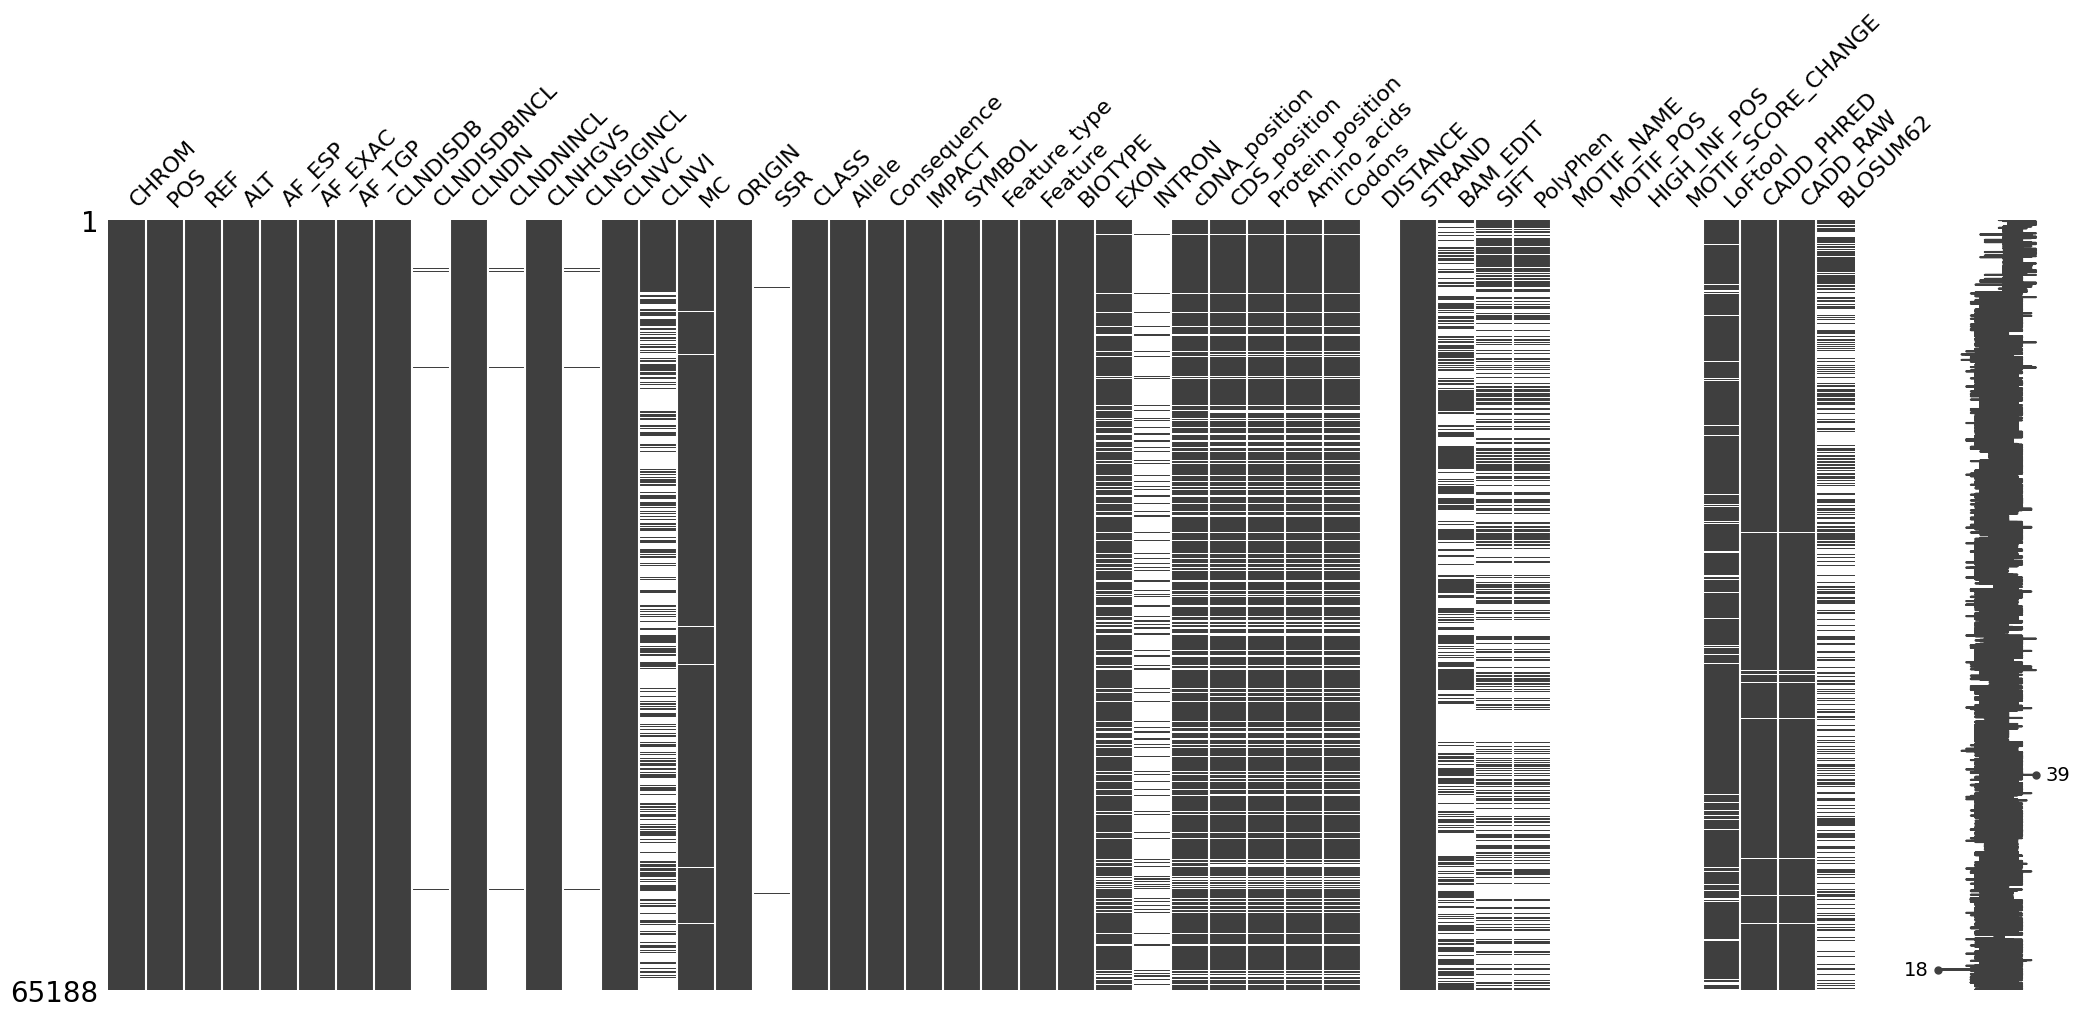

In [29]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

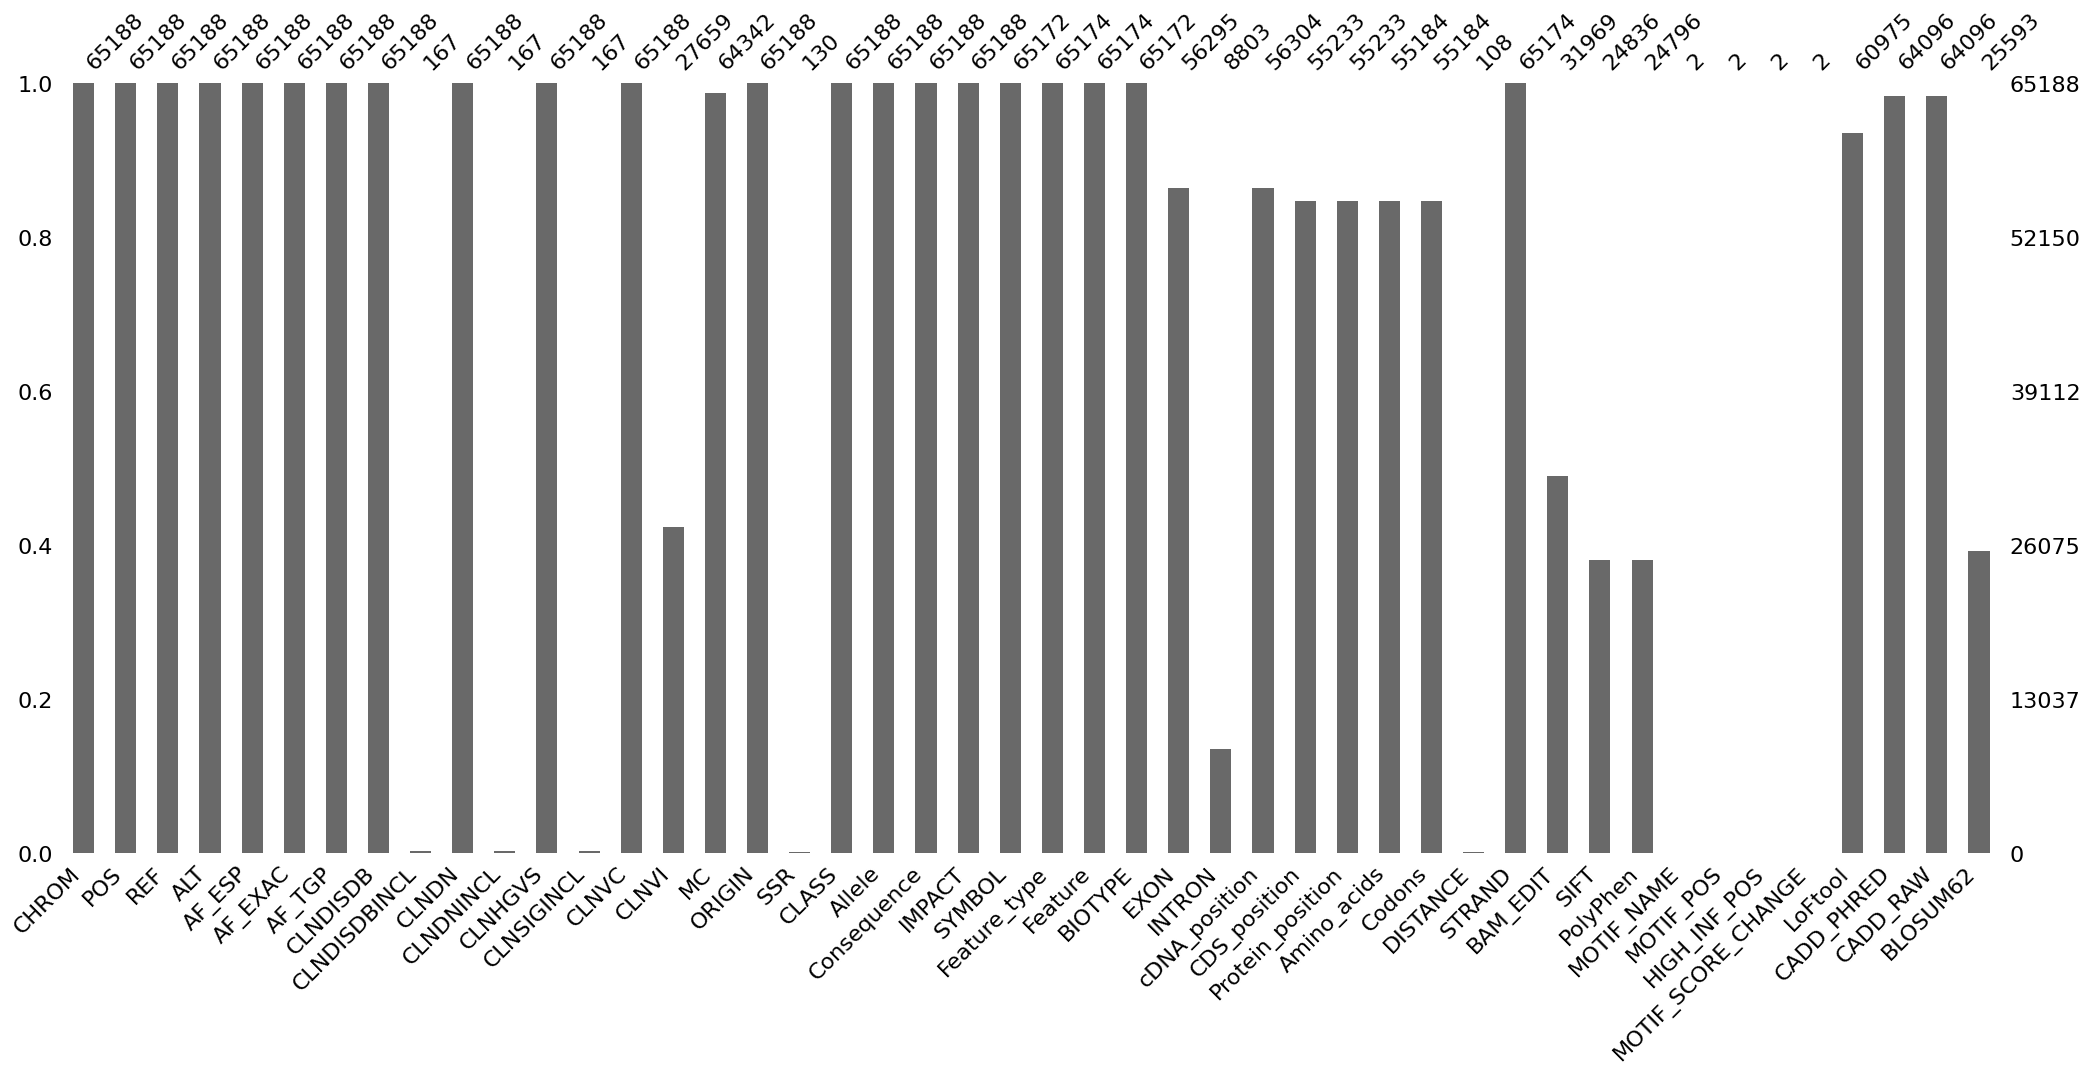

In [28]:
msno.bar(df)
plt.show()

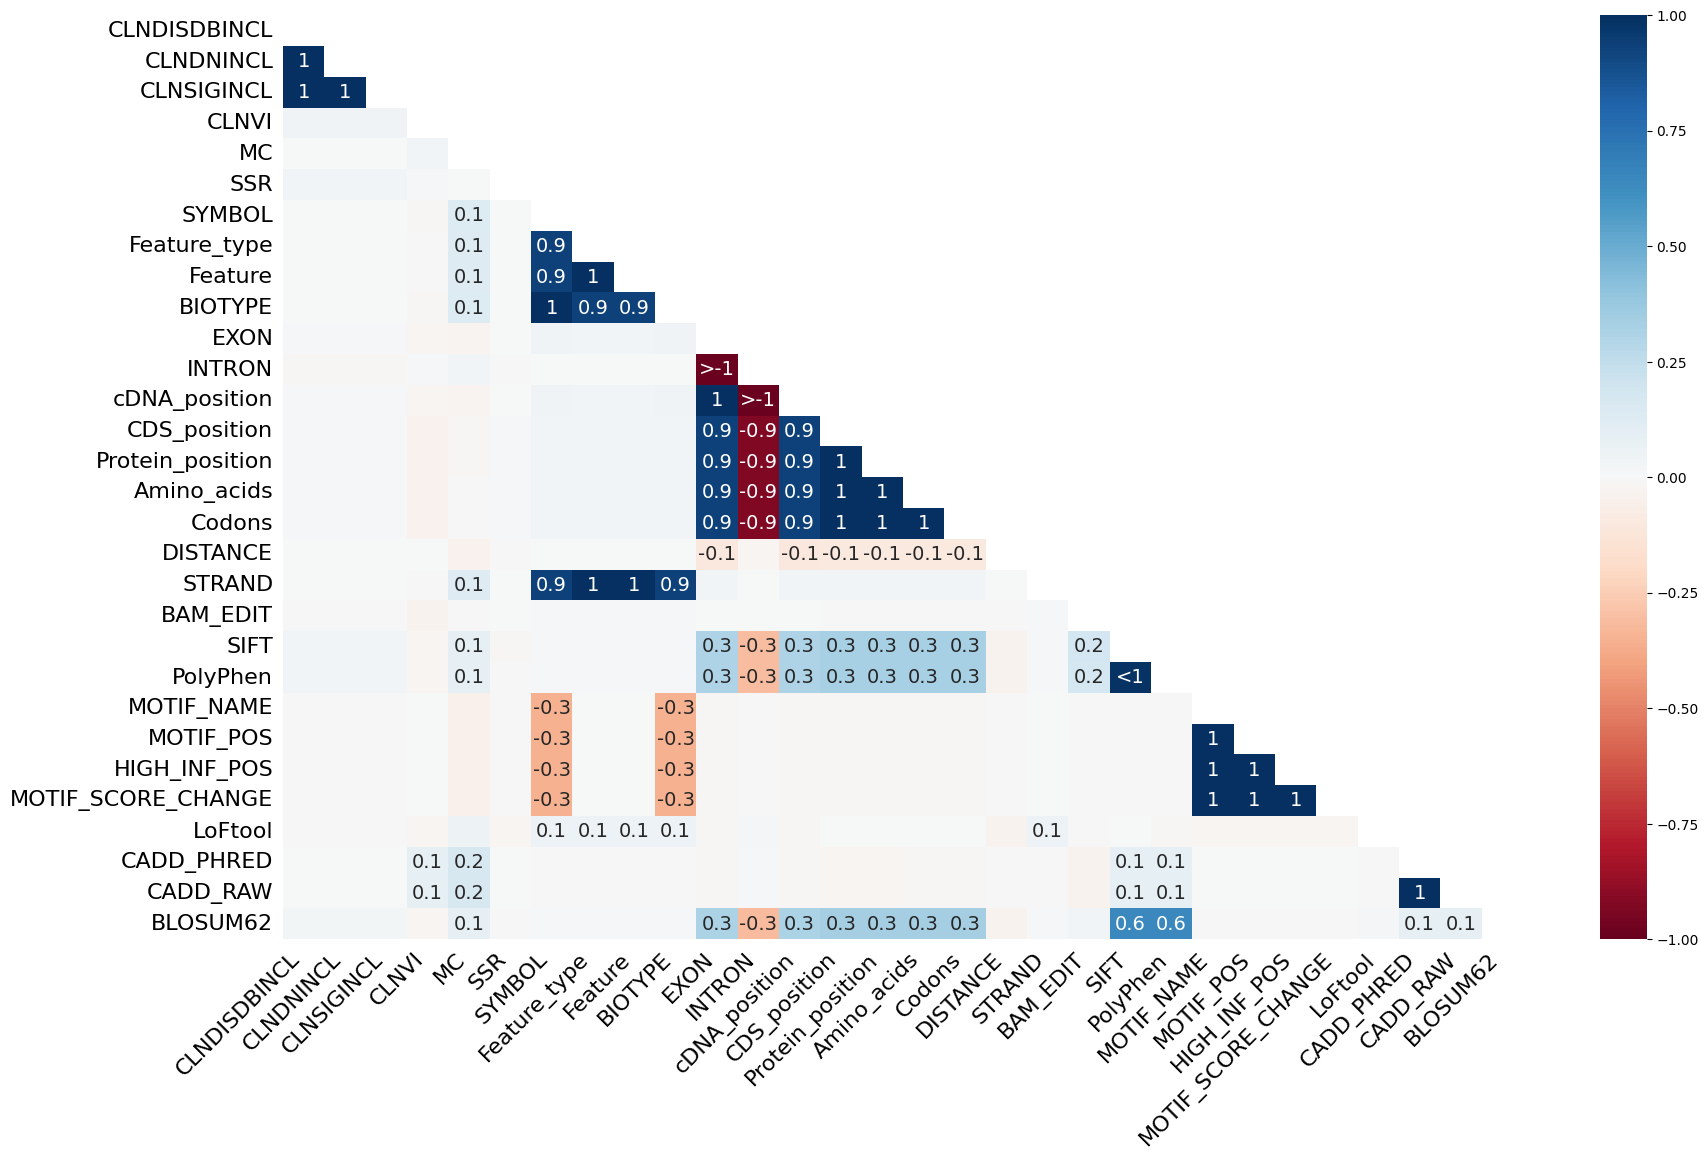

In [27]:
msno.heatmap(df)
plt.show()


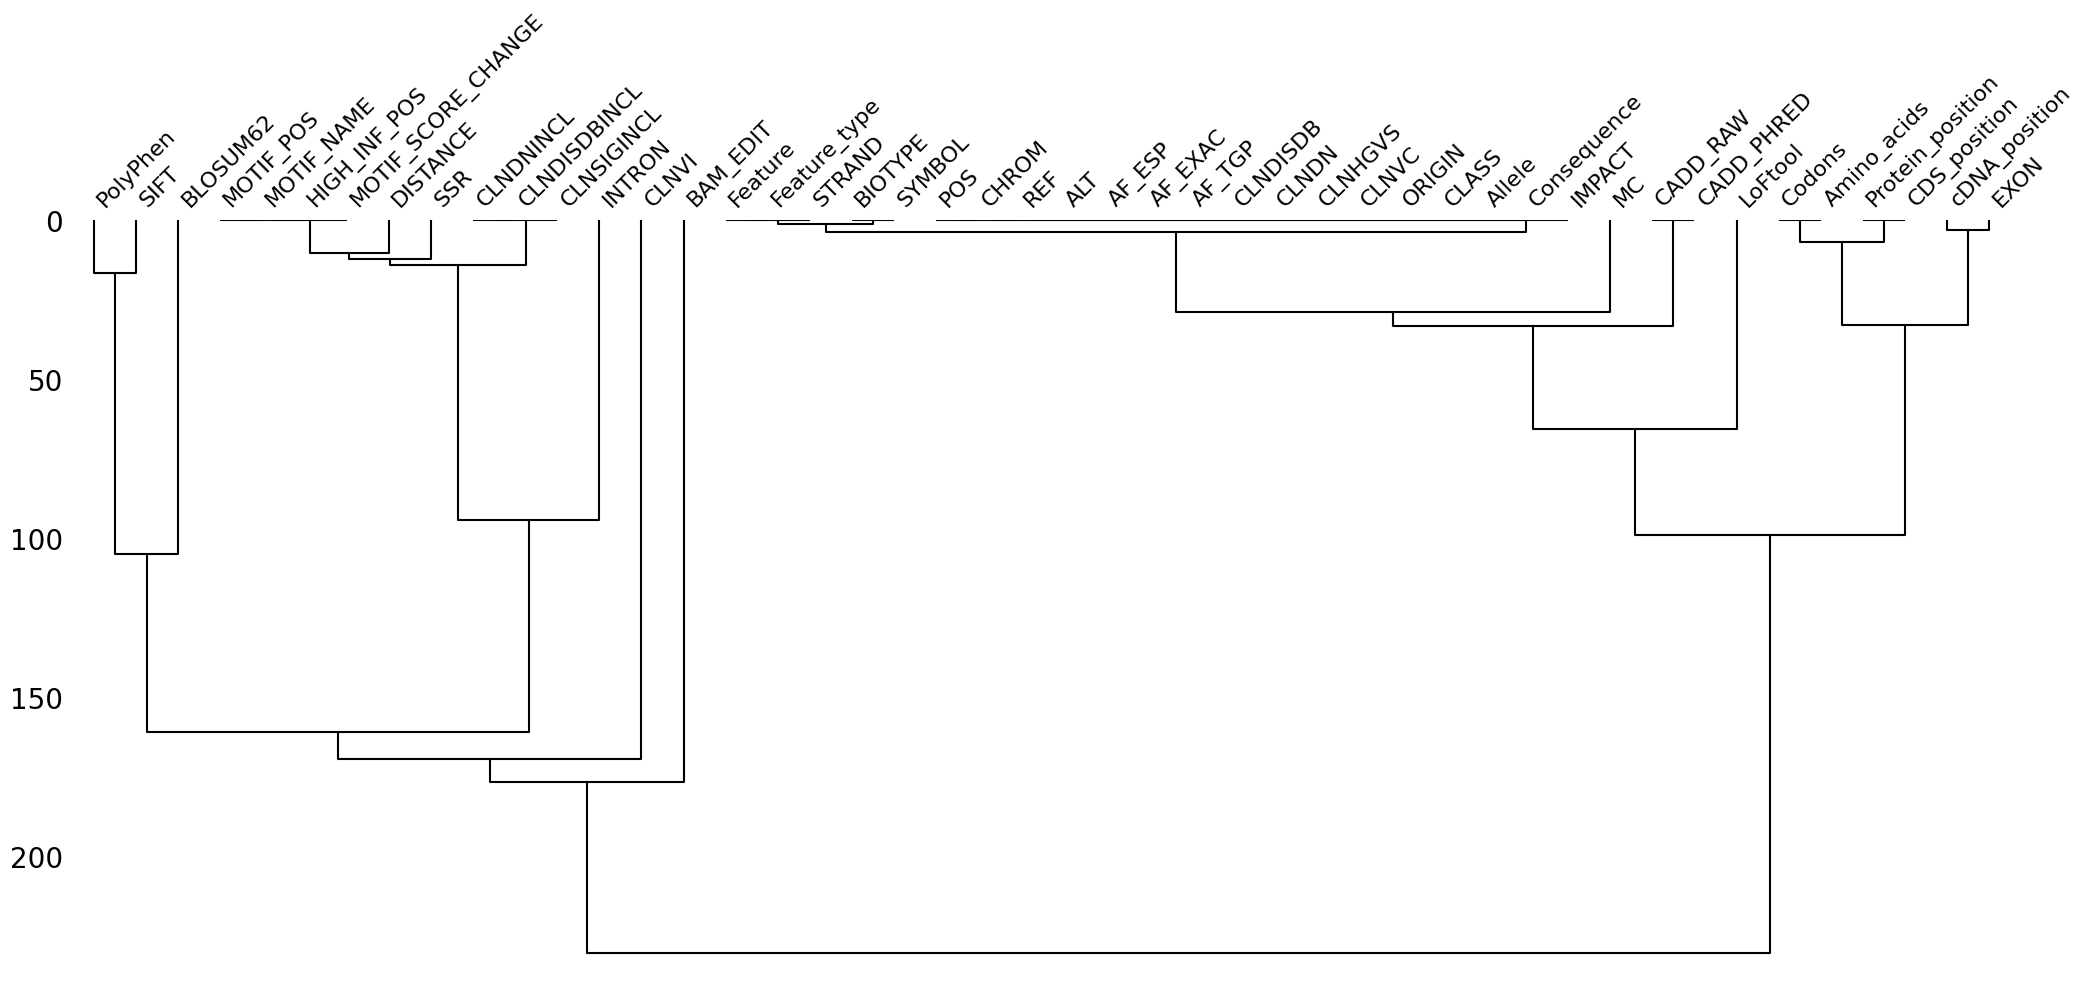

In [26]:
msno.dendrogram(df)
plt.show()

In [30]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
print(missing_percentages.sort_values(ascending=False))

MOTIF_POS             99.996932
MOTIF_NAME            99.996932
MOTIF_SCORE_CHANGE    99.996932
HIGH_INF_POS          99.996932
DISTANCE              99.834325
SSR                   99.800577
CLNSIGINCL            99.743818
CLNDISDBINCL          99.743818
CLNDNINCL             99.743818
INTRON                86.495981
PolyPhen              61.962324
SIFT                  61.900963
BLOSUM62              60.739707
CLNVI                 57.570412
BAM_EDIT              50.958765
Amino_acids           15.346383
Codons                15.346383
Protein_position      15.271216
CDS_position          15.271216
EXON                  13.642081
cDNA_position         13.628275
LoFtool                6.462846
CADD_RAW               1.675155
CADD_PHRED             1.675155
MC                     1.297785
BIOTYPE                0.024544
SYMBOL                 0.024544
Feature                0.021476
STRAND                 0.021476
Feature_type           0.021476
CLNVC                  0.000000
CLNHGVS 